# **Parte práctica tercer parcial**
-Breiner Farid Amaya Ibagüe

-Johan Andrey Santamaría Ariza

-Nixon Estiven Santos Trillos

#**Introducción:**
En este contexto, las variables el cual se va a analizar son el tiempo de gestación (T_GES) y la talla de nacimiento (TALLA_NAC). Donde el objetivo es ver si existe una correlación entre estas dos variables.

Estudiar la relación entre el tiempo de gestación y la talla de nacimiento permite identificar hasta qué punto estos dos factores están relacionados. Por ejemplo, una gestación más corta podría resultar en una talla de nacimiento menor debido a la reducción del tiempo de crecimiento fetal. Entonces, los problemas de crecimiento del feto pueden ser causa de un parto prematuro. Así que, entender la interrelación es importante para identificar los riesgos.
La investigación titulada "Asociación entre la antropometría materna y el producto de la gestación", toma como crucial la salud de la madre y los efectos que producen sobre las medidas antropométricas del bebé recién nacido, tal como la talla al nacer. Este estudio hace especial énfasis de cómo la nutrición y salud de la madre durante el embarazo influyen directamente en la salud del recién nacido, lo cual tiene implicaciones para la salud del recién nacido a largo plazo.

En particular, se ha encontrado que parámetros antropométricos maternos como el índice de masa corporal (IMC), la ganancia de peso durante el embarazo y las condiciones metabólicas están estrechamente relacionados con el tiempo de gestación y la talla de nacimiento.

Además, el estudio "Estado nutricional de embarazadas en el último mes de gestación y su asociación con las medidas antropométricas de sus recién nacidos" refuerza la importancia del estado nutricional materno en el último trimestre del embarazo. Este estudio revela que las mujeres con un estado nutricional adecuado presentan menos complicaciones durante el parto y dan a luz a recién nacidos con mejores medidas antropométricas, como mayor talla y peso al nacer.




In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns
import numpy as np

uploaded = files.upload()

Saving nac2020 (1).csv to nac2020 (1) (2).csv


##**Análisis de datos:**
A continuación, se presentan gráficos que ilustran la distribución de ambas variables y su correlación. Los gráficos ofrecen una visualización clara de los datos, facilitando la comprensión de los patrones observados.



# Estadística descriptiva para variables cualitativas


*   Gráficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa



In [ ]:
io_csv = io.BytesIO(uploaded['nac2020 (1) (2).csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
44,6,9
44,6,9
44,6,9
44,6,9


In [ ]:
df2 = tabla1[(tabla1.T_GES < 6) & (tabla1.TALLA_NAC != 9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


In [ ]:
#df2 = tabla1[(tabla1.T_GES < 6) & (tabla1.TALLA_NAC != 9)]
import pandas as pd
df2.T_GES.head(4)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(4)

<ipython-input-20-1c6a26298c4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
27    4
27    4
Name: T_GES, dtype: object

In [ ]:
df2.loc[(df2.T_GES == '1'), 'T_GES'], df2.loc[(df2.T_GES == '2'), 'T_GES'], df2.loc[(df2.T_GES == '3'), 'T_GES'] = 'Menos de 22', '22 a 27', '28 a 37'
df2.loc[(df2.T_GES == '4'), 'T_GES'], df2.loc[(df2.T_GES == '5'), 'T_GES'] = '38 a 41', '42 y más'

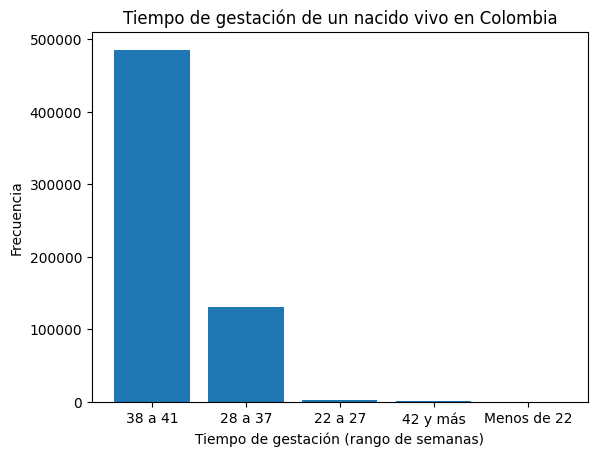

In [ ]:
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values)
plt.title('Tiempo de gestación de un nacido vivo en Colombia')
plt.xlabel('Tiempo de gestación (rango de semanas)')
plt.ylabel('Frecuencia')
plt.show()

El valor de 38 a 41 semanas es el rango de tiempo de gestación donde se presentan cerca de 500000 nacidos vivos en Colombia, y es donde se tienen más recién nacidos. El rango de tiempo de gestación de 28 a 37 semanas tiene cerca de 150000 nacidos vivos en Colombia. Los rangos de tiempo de gestación de menos de 22 semanas, de 22 a 27 semanas y de 42 y más semanas tienen un valor más bajo y cercano a 0 de nacidos vivos en Colombia.

In [ ]:
sizes = np.array(y_values)
sizes

array([485433, 130485,   2236,   1163,     28])

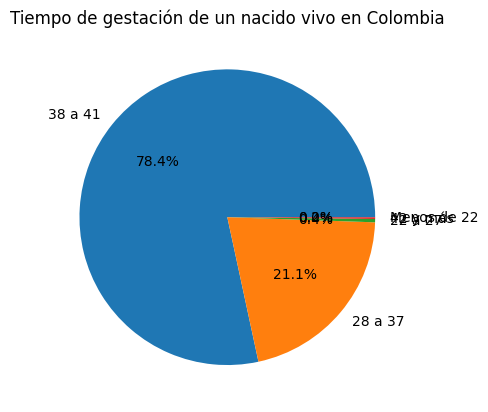

In [ ]:
plt.pie(y_values, labels = x_values, autopct= '%1.1f%%')
plt.title('Tiempo de gestación de un nacido vivo en Colombia')
plt.show()

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38 a 41' '28 a 37' '22 a 27' '42 y más' 'Menos de 22']
[78.37844819930734, 21.068225302537357, 0.3610265683908, 0.18777902461471394, 0.004520905149795348]


Aproximadamente el 78.38% de los nacidos en Colombia tienen entre 38 y 41 semanas de gestación, el 21.06% entre 28 y 37 semanas, el 0.36% entre 22 y 27 semanas, el 0.18% entre 42 y más semanas y el 0.004% tienen menos de 22 semanas.

In [ ]:
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.loc[(df2.TALLA_NAC == '1'), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == '2'), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == '3'), "TALLA_NAC"] = 'Menos de 20', '20-29', '30-39'
df2.loc[(df2.TALLA_NAC == '4'), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == '5'), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == '6'), "TALLA_NAC"] = '40-49', '50-59', '60 y Más'


<ipython-input-11-f7743d049dd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


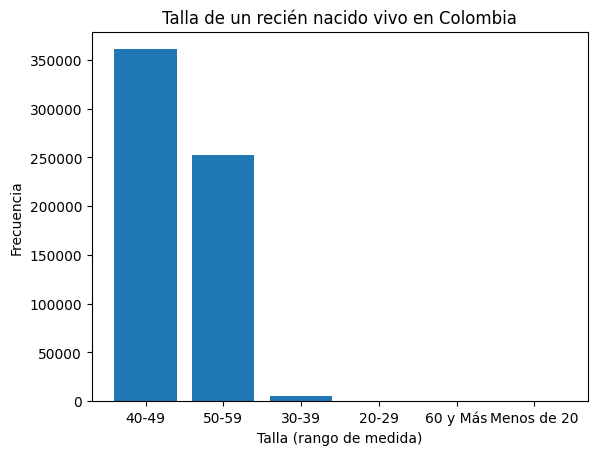

In [ ]:
x_values2 = df2.TALLA_NAC.unique()
y_values2 = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values2, y_values2)
plt.title('Talla de un recién nacido vivo en Colombia')
plt.xlabel('Talla (rango de medida)')
plt.ylabel('Frecuencia')
plt.show()

El valor de talla 40-49 es el rango de talla donde se presentan aproximadamente 360000 recién nacidos vivos en Colombia y es la talla que más repite, es decir, es el rango que tiene más recién nacidos vivos en Colombia. La talla 50-59 tiene aproximadamente 250000 recién nacidos vivos en Colombia. Los rangos de talla de menos de 20, de  talla 20-29, de talla 30-39 y de talla 60 y más tienen los valores más bajo y cercanos a 0 recién nacidos vivos en Colombia.

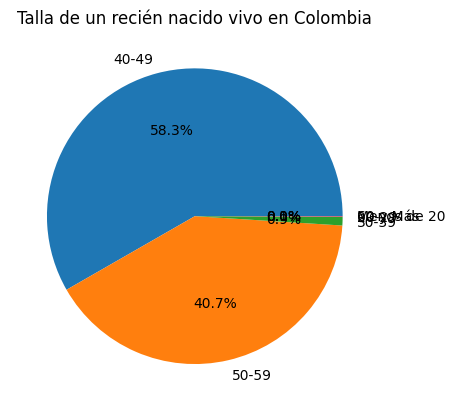

In [ ]:
plt.pie(y_values2, labels = x_values2, autopct= '%1.1f%%')
plt.title('Talla de un recién nacido vivo en Colombia')
plt.show()

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values2]
print(x_values2)
print(porcentaje)

['40-49' '50-59' '30-39' '20-29' '60 y Más' 'Menos de 20']
[58.28899886170067, 40.706391429655525, 0.9195198152887324, 0.06636042916306743, 0.018406542395595346, 0.00032292179641395344]


In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
intervalos1 = range(min(df2.TALLA_NAC), max(df2.TALLA_NAC) + 1)
plot.figure(figsize=(10,6))
sns.histplot(x = df2.TALLA_NACE, bins = intervalos1, kde = True, stat = 'density', color = 'skyblue', edgecolor = 'black'  ) #kde = True significa que es la gráfica de función de probabilidad estimada por un método kernell

xmin, xmax = plt.xlim() #Gráfica de distribución normal
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE)) #gráfica de función de densidad de probabilidad de la distribución normal

plt.plot(x, p, 'k', linewidth = 2, label = 'Distribución normal ', color = "darkblue")
sns.kdeplot(x = df1.EDAD_PADRE, color = "pink")
plt.title('Histograma, Función de densidad por un kernel y Distribución normal')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
#Mostrar gráfico
plt.show()

Aproximadamente el 58.28% de recién nacidos vivos en Colombia son de talla 40-49, el 40.7% son de talla 50-59, el 0.91% son de talla 30-39, el 0.06% son de talla 20-29, el 0.01% son de talla 60 y más y el 0.0003% presentan talla de menos de 20.

# Tablas de contingencia


*   Representación gráfica de una tabla de contingencia.
*   Proporciones asociadas a una tabla de contingencia.



In [ ]:
df2.loc[(df2.TALLA_NAC == 1), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 2), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 3), "TALLA_NAC"] = 'Menos de 20', '20-29', '30-39'
df2.loc[(df2.TALLA_NAC == 4), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 5), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 6), "TALLA_NAC"] = '40-49', '50-59', '60 y Más'
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)

df2.loc[(df2.T_GES == 1), 'T_GES'], df2.loc[(df2.T_GES == 2), 'T_GES'], df2.loc[(df2.T_GES == 3), 'T_GES'] = 'Menos de 22', '22 a 27', '28 a 37'
df2.loc[(df2.T_GES == 4), 'T_GES'], df2.loc[(df2.T_GES == 5), 'T_GES'] = '38 a 41', '42 y más'
df2.T_GES = df2.T_GES.astype(str)

df2.head(3)

<ipython-input-15-c401181f3c6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
<ipython-input-15-c401181f3c6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
52,38 a 41,40-49
20,38 a 41,50-59
27,38 a 41,50-59


In [ ]:
tabla_cont = pd.crosstab(df2.T_GES, df2.TALLA_NAC)
tabla_cont

TALLA_NAC,20-29,30-39,40-49,50-59,60 y Más,Menos de 20
T_GES,,,,,,
22 a 27,260,1872,102,0,0,2
28 a 37,53,3619,89212,37593,8,0
38 a 41,76,198,162543,322515,101,0
42 y más,0,0,256,902,5,0
Menos de 22,22,6,0,0,0,0


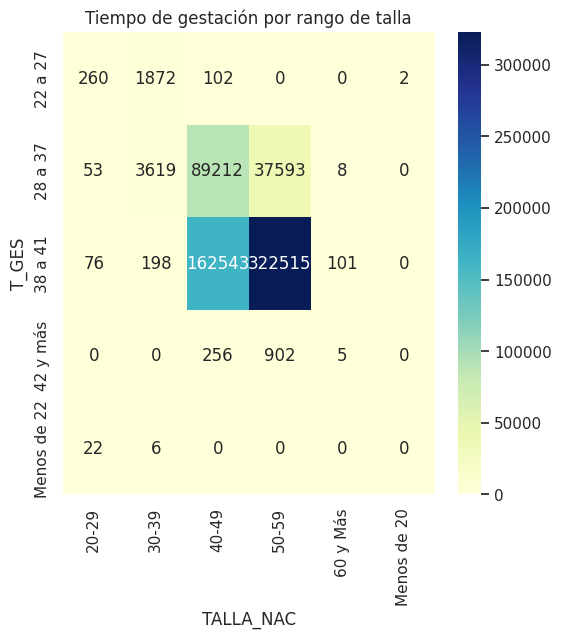

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(tabla_cont, annot=True, fmt = 'd', cmap = 'YlGnBu', cbar = True)
heatmap.set_title('Tiempo de gestación por rango de talla')
plt.show()

In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es de {valor_p}")


El valor de la estadística Chi cuadrado es 305687.2032391818 y el valor p es de 0.0




*   Si el valolr p < 0.05 se rechaza la hipotesis nula  
*   Si el valolr p > 0.05 no se rechaza la hipotesis nula



Como el valor p $= 0.0 < 0.05$ se rechaza la hipotesis nula, es decir, se rechaza con una confianza del 95% que el tiempo de gestación en semanas de un nacido vivo y la talla de un recién nacido vivo en Colombia están asociadas.

In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df2.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.T_GES)*min(5-1, 6-1)))
print(f"El coeficiente de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

El coeficiente de contingencia, Phi y V de Cramer están respectivamente dados por 0.5748575017974198, 0.7025420300976799 y 0.35127101504883995


De acuerdo con el artículo Landis, JR y Koch, GG (1977). Medición del acuerdo entre observadores para datos categóricos. Biometría , 159-174, el cual se puede consultar en el siguiente [link](https://www.jstor.org/stable/2529310) y dado que ($0.2 < Chi, \phi, V < 0.8$) asumiremos que la talla de un recién nacido vivo en Colombia y el tiempo de gestación de un nacido vivo en Colombia están moderadamente asociadas.

## **Conclusiones**
Al analizar los datos y diferente tipo de información proporcionada, se han concluido los siguientes enunciados:

*	Aproximadamente el 78.38% de los nacidos en Colombia tienen entre 38 y 41 semanas de gestación.

*   Existe una correlación significativa entre el tiempo de gestación y la talla de nacimiento. Una gestación más corta puede resultar en una talla menor al nacer debido a la reducción del tiempo de crecimiento fetal.

*  Las gestaciones completas (38-41 semanas) están asociadas con mejores resultados de salud en los recién nacidos, mientras que las gestaciones más cortas se relacionan con un mayor riesgo de complicaciones inmediatas y a largo plazo.

* Los rangos de tiempo de gestación de menos de 22 semanas, de 22 a 27 semanas y de 42 y más semanas tienen un valor más bajo y cercano a 0 de nacidos vivos en Colombia, estos son datos atípicos y es muy difícil que un bebé sobreviva en dichos intervalos de tiempo, no obstante, hay excepciones a la regla, tal como lo indica el diario, Bebés y más, donde en Barranquilla, nació una pequeña con apenas 22 semanas de gestación. Otra excepción increíble a dicha regla es la presentada en el departamento de Santander, según informa el diario, El Universo, un bebé nace 35 días después de la muerte cerebral de su madre, él tenía 27 semanas de gestación.
* Aproximadamente el 58.28% de recién nacidos vivos en Colombia son de talla 40-49. Según, un estudio de la UNAM, la contaminación afecta la genética de las mujeres y esto el peso y talla de los recién nacidos, por ende, el estado colombiano debería intervenir de la mano de gobernantes regionales para reducir la contaminación de las grandes urbes colombianas, proporcionando así una buena calidad de vida a mujeres en estado de embarazo y recién nacidos.
* La talla de un recién nacido vivo en Colombia y el tiempo de gestación están moderadamente asociadas, dado que si una madre tiene poco tiempo de gestación el bebé nacerá con menor talla y viceversa.
*	Aproximadamente el 0.91% de recién nacidos son de talla 30-39, el 0.06% son de talla 20-29, el 0.01% son de talla 60 y más y el 0.0003% presentan talla de menos de 20. Según datos de ABC Familia, los recién nacidos con una baja talla para su edad gestacional tienen riesgo de padecer enfermedad cardiovascular similar a la del tabaco.
*	En el mundo de la medicina hay casos que se salen de lo que consideramos normal, tanto es así, que según uno de los medios de comunicación más populares de Colombia, Caracol TV, en Barranquilla nació un bebé con peso y estatura de un niño de 4 meses.



## **Referencias:**

*   Martin Carrillo, S., Pérez Guillén, A., Armenia Hernández Hernández, R., & Herrera Mogollón, H. A. (2010). Asociación entre la antropometría materna y el producto de la gestación. Nutrición Hospitalaria, 25(5), 832-837.

*   Mendoza, L., Pérez, B., & Sánchez Bernal, S. (2010). Estado nutricional de embarazadas en el último mes de gestación y su asociación con las medidas antropométricas de sus recién nacidos. Pediatría (Asunción), 37(2), 91-96.

* Rovati, L. (2007b, marzo 3). Sobrevive bebé nacida en Colombia con apenas cinco meses de gestación. Bebés y Más. https://www.bebesymas.com/otros/sobrevive-bebe-nacida-en-colombia-con-apenas-cinco-meses-de-gestacion
* https://youtu.be/LGgBU7W9-RQ?si=StMn-A9ddUyANxb2

* Solís, J. (2017, 22 septiembre). Bebé nace 35 días después de la muerte cerebral de su madre, en Colombia. Internacional | Noticias | el Universo. https://www.eluniverso.com/noticias/2017/09/22/nota/6394855/bebe-nace-35-dias-despues-muerte-cerebral-su-madre-colombia/

* Colombia - Estadísticas vitales - EEVV - 2020. (s. f.). https://microdatos.dane.gov.co/index.php/catalog/732/get-microdata


* Caracol, N. (2017, 15 septiembre). Nace un bebé con peso y estatura de un niño de 4 meses en Barranquilla. Noticias Caracol. https://www.noticiascaracol.com/colombia/nace-un-bebe-con-peso-y-estatura-de-un-nino-de-4-meses-en-barranquilla

* Familia, A. (2021, 30 agosto). Los recién nacidos pequeños para su edad gestacional tienen riesgo de padecer enfermedad cardiovascular sim. . . Diario ABC. https://www.abc.es/familia/bebes/abci-recien-nacidos-pequenos-para-edad-gestacional-tienen-riesgo-padecer-enfermedad-cardiovascular-similar-tabaco-202108190124_noticia.html?ref=https%3A%2F%2Fwww.abc.es%2Ffamilia%2Fbebes%2Fabci-recien-nacidos-pequenos-para-edad-gestacional-tienen-riesgo-padecer-enfermedad-cardiovascular-similar-tabaco-202108190124_noticia.html






